In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import geopandas as gpd
import warnings
from matplotlib import cm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import statsmodels.api as sm
import weighted
import seaborn as sns
import scipy.stats as stats
import pylab
from graphviz import Digraph
import os
import jenkspy
from IPython.display import Image

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
warnings.filterwarnings("ignore")

/Users/Vinny_Ricciardi/virtenvs/py2_geocode_update/lib/python2.7/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
def plt_map(data, title='None', ax=None):

    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    world = world[(world.name!="Antarctica")]
    world = world.to_crs("+proj=robin")
    
    world = pd.merge(world, data, left_on='iso_a3', right_on='ISO', how='outer')

    nodata = world.loc[world['Count'].isnull()]
    isdata = world.loc[world['Count'].notnull()]
    isdata['Count'] = np.log(isdata['Count'])

    nodata.plot(column='Count', 
                ax=ax, 
                color='k', 
                alpha=0.1)
        
    cax = isdata.plot(column='Count', 
                ax=ax, 
                cmap='Purples', 
                alpha=1., 
                edgecolor='k', 
                linewidth=.3)
        
    ax.grid(alpha=0.0)

    plt.tick_params(
        axis='both',          
        which='both',      
        bottom='off',      
        top='off',         
        labelbottom='off') 

    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

#     ax.set_title(title, fontsize=24)
        
    return ax

    
def colorbar_cax(fig, axes=[None], ticks=[None], ticklabels=[None]):
    """
    Plots color bar
    params:
        fig
    return:
        cbar object
    """
    
    cax = fig.add_axes(axes)
    vmin, vmax = -1, 1
    sm = plt.cm.ScalarMappable(cmap='coolwarm_r', norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []  # fake up the array of the scalar mappable.
    cbar = fig.colorbar(sm, cax=cax)

    return cbar

In [3]:
df = pd.read_csv('../data/Country_Counts/country_counts_All_AllStudies_observations.csv')

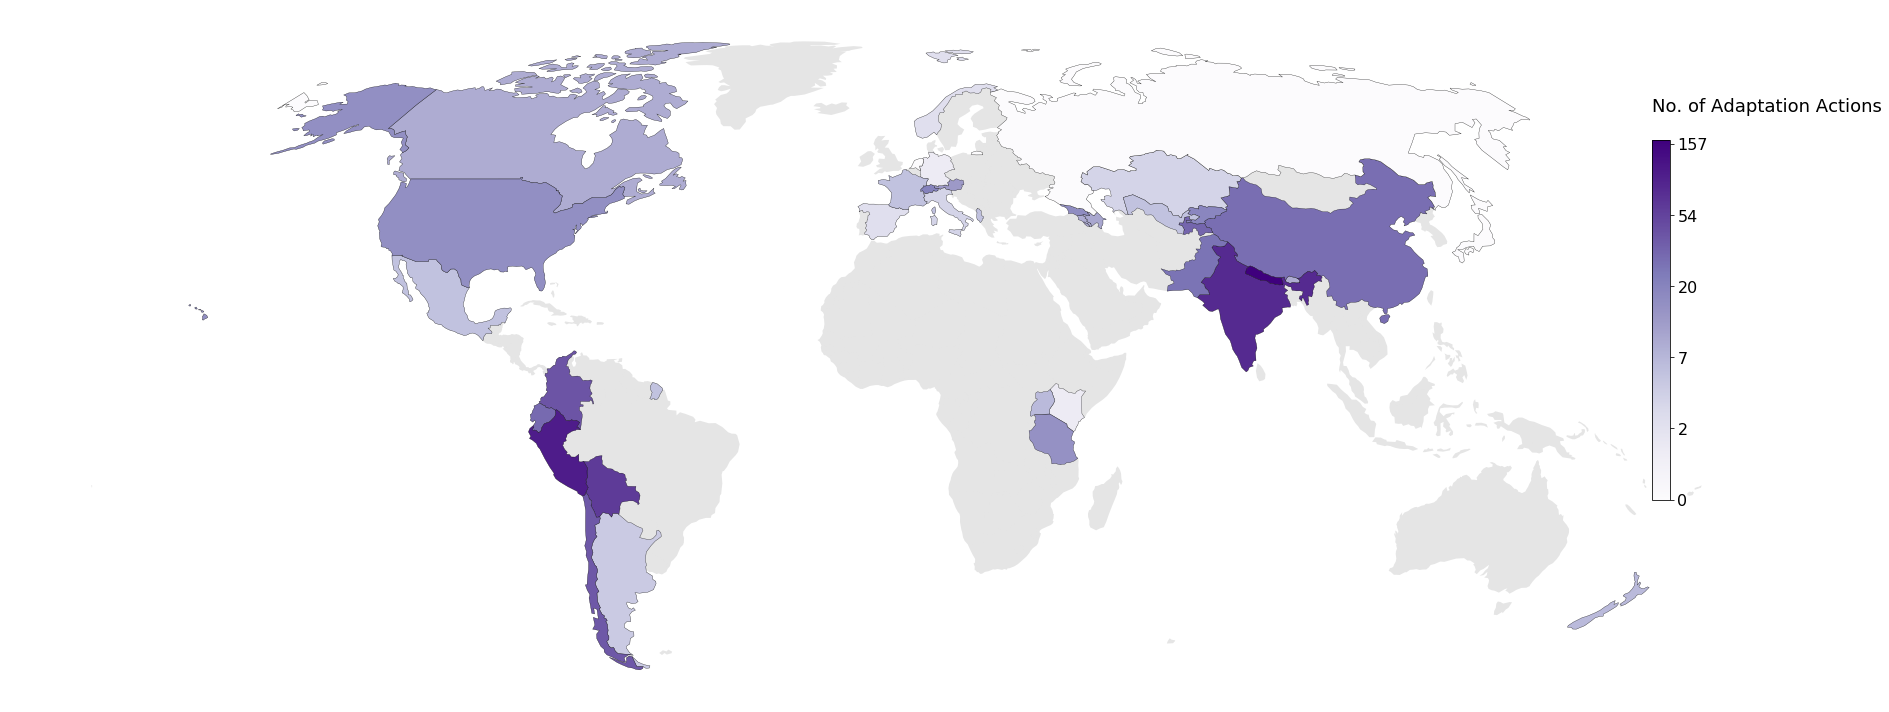

In [6]:
fig, ax = plt.subplots(figsize=[25, 10])
plt_map(df, title='Figure 2. No. Discrete Adaptations by Country', ax=ax)

# Add colorbar
cax = fig.add_axes([0.92, 0.3, 0.01, 0.5])
sm = plt.cm.ScalarMappable(cmap='Purples', 
                           norm=plt.Normalize(vmin=np.log(df['Count']).min(), 
                                              vmax=np.log(df['Count']).max()))
sm._A = []  # fake up the array of the scalar mappable.
cbar = fig.colorbar(sm, cax=cax)
# labels = [0, np.exp(1), np.exp(2), np.exp(3), np.exp(4), np.exp(5)]
labels = [0, np.exp(1), np.exp(2), np.exp(3), np.exp(4), df['Count'].max()]  # Cheat to get largest number
labels = [str(int(l)) for l in labels]
cbar.ax.set_yticklabels(labels, fontsize=16)
# cbar.set_label('No.\nAdaptations', fontsize=18, rotation=0, labelpad=3)
fig.text(.92, .84, 'No. of Adaptation Actions', fontsize=18)



# Add subplot
# cax = fig.add_axes([0., 0.1, 0.2, 0.3])
# tmp = df.sort_values('Count', ascending=False).iloc[:10, :]
# sns.barplot(x='Count', 
#             y='ISO', 
#             data=tmp, 
# #             color='grey', 
#             palette=sns.color_palette('Purples_r', 20),
#             ax=cax)

# # Turn off top and right spines
# cax.spines['right'].set_visible(False)
# cax.spines['top'].set_visible(False)

# # Labels
# cax.set_title('Top Ten Countries\n', fontsize=18)
# cax.set_ylabel('')
# cax.set_xlabel('\nNo. Adaptations', fontsize=17)
# for tick in cax.xaxis.get_major_ticks():
#     tick.label.set_fontsize(16) 
# for tick in cax.yaxis.get_major_ticks():
#     tick.label.set_fontsize(16) 

# for label in cax.get_yticklabels():
#     label.set_horizontalalignment('left')

# yax = cax.get_yaxis()
# yax.set_tick_params(pad=40)  # Moves plot over to accomodate yaxis left alignment


fig.tight_layout()
plt.savefig('/Users/Vinny_Ricciardi/Downloads/Map_Discrete_Apatations.png', bbox_inches='tight', dpi=1000)
plt.show()